# Kaggle Titanic

[Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic)

In [218]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

# use prettier ggplot style
matplotlib.style.use('ggplot')

% matplotlib inline

In [219]:
#print(os.getcwd() + "\n")

# load data
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

## Descriptive Statistics

In [220]:
uniq = pd.Series([len(pd.unique(train[x].values.ravel())) for x in train.columns.values], train.columns)
print len(train.index), "observations,", len(train.columns), "dimensions\n", \
      pd.DataFrame([train.dtypes, train.count(), uniq, train.isnull().sum()], index=['type', 'count', 'UNIQUE', 'NA']).transpose()

891 observations, 12 dimensions
                type count UNIQUE   NA
PassengerId    int64   891    891    0
Survived       int64   891      2    0
Pclass         int64   891      3    0
Name          object   891    891    0
Sex           object   891      2    0
Age          float64   714     89  177
SibSp          int64   891      7    0
Parch          int64   891      7    0
Ticket        object   891    681    0
Fare         float64   891    248    0
Cabin         object   204    148  687
Embarked      object   889      4    2


In [221]:
print train.select_dtypes(['object']).describe().transpose(), '\n'
print train.select_dtypes(['int64']).describe().transpose(), '\n'
print train.select_dtypes(['float64']).describe().transpose()

         count unique                        top freq
Name       891    891  Graham, Mr. George Edward    1
Sex        891      2                       male  577
Ticket     891    681                   CA. 2343    7
Cabin      204    147                C23 C25 C27    4
Embarked   889      3                          S  644 

             count        mean         std  min    25%  50%    75%  max
PassengerId    891  446.000000  257.353842    1  223.5  446  668.5  891
Survived       891    0.383838    0.486592    0    0.0    0    1.0    1
Pclass         891    2.308642    0.836071    1    2.0    3    3.0    3
SibSp          891    0.523008    1.102743    0    0.0    0    1.0    8
Parch          891    0.381594    0.806057    0    0.0    0    0.0    6 

      count       mean        std   min      25%      50%  75%       max
Age     714  29.699118  14.526497  0.42  20.1250  28.0000   38   80.0000
Fare    891  32.204208  49.693429  0.00   7.9104  14.4542   31  512.3292


In [222]:
# print counts per category
#for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
#    print pd.DataFrame(train[col].value_counts(dropna=False)), '\n' # automatically sorts by count (desc)

In [223]:
# descriptive statistics
train.groupby('Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [224]:
# clean data (fill missing Embark and Age values)
train.Embarked.fillna('S', inplace=True) # assume 'S'
meanAge = train.Age.mean()
train.Age = train.Age.fillna(meanAge)


In [225]:
# convert to categories (requires pandas 0.15+)
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    train[col] = train[col].astype('category')


# Feature Correlation

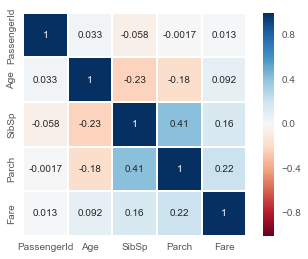

In [226]:
# does not work on category or object
corr = train.corr()
sns.heatmap(corr, square=True, annot=True, linewidths='1', cmap="RdBu")
pass

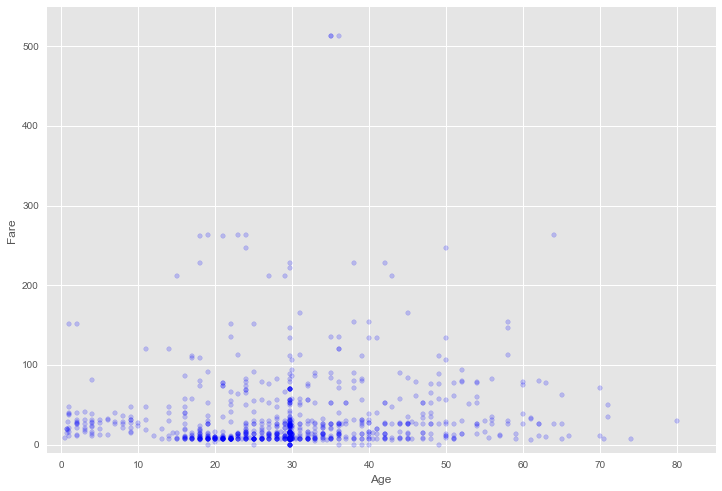

In [227]:
matplotlib.style.use('ggplot')

# visualization with matplotlib
plt.scatter(y=train.Fare, x=train.Age, alpha=0.2, color="blue")
plt.gcf().set_size_inches(12,8)

#plt.minorticks_on()
#plt.grid(b=True, which='major', c='gray', linestyle='-')
#plt.grid(b=True, which='minor', c='lightgray', linestyle='--')
plt.xlim([-2,85])
plt.ylim([-10,550])
plt.xlabel('Age')
plt.ylabel('Fare')
pass

In [228]:
# Random Forest

# must encode categories as integers
sexEncoder = preprocessing.LabelEncoder()
train['Sex'] = sexEncoder.fit_transform(train.Sex)
embEncoder = preprocessing.LabelEncoder()
train['Embarked'] = embEncoder.fit_transform(train.Embarked)

columns = np.array(['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked'])

forest = RandomForestClassifier(n_estimators=1000, max_depth=5)
fit = forest.fit(train[columns], train.Survived)

In [229]:
train.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [230]:
# analyze variable importance
# (inspired by http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html)
varImportance = pd.Series(fit.feature_importances_, index=columns).sort_values()
print varImportance

Embarked    0.034499
Parch       0.036366
SibSp       0.049240
Age         0.108600
Pclass      0.145593
Fare        0.170951
Sex         0.454751
dtype: float64


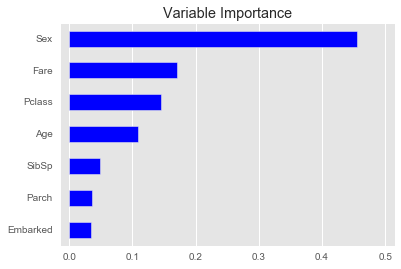

In [231]:
varImportance.plot.barh() # color='skyblue'
ax = plt.gca()
ax.yaxis.grid(False)
#ax.set_axisbelow(True)
#ax.set_axis_bgcolor('darkgrey')
#ax.xaxis.grid(color='white', linestyle='solid', linewidth='1')
#ax.set_frame_on(False)
plt.tick_params(axis='y', left='off', right='off')
plt.tick_params(axis='x', top='off', direction='out')
plt.title('Variable Importance')
plt.xlim(-0.015, 0.515)
pass